<a href="https://colab.research.google.com/github/himanshu3103/PyTorch/blob/main/Moore's_Law_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Moore's Law

## Theory
Exponential growth can be modeled as :<br>
\begin{align}
C = C_0r^t
\end{align}
Here $ C $ is the transistor count, $t$ is the time in years, $C_0$ is the original transistor count at year 0 and $r$ is the growth rate.<br>
Converting the equation to log scale to apply linear regression<br>
\begin{align}
\log C = t*\log r + \log C_0
\end{align}

This is similar to: <br>
\begin{align}
y = a*X + \log C_0
\end{align}

## Model
### Normalization
\begin{align}
y^{'} = \frac{y-\mu_y}{\sigma_y} \\ \\
x^{'} = \frac{x-\mu_x}{\sigma_x}
\end{align}
Model : \begin{align} \\
y^{'} = wx^{'} + b
\end{align}
<br>
After substituting $y^{'}$ and $x^{'}$ into the model we get:
\begin{align}
\\
y = w\frac{\sigma_y}{\sigma_x}x+constant
\end{align}
<br>
Therefore we can conclude that 
\begin{align}
\\
a = w\frac{\sigma_y}{\sigma_x}
\end{align}

## Code

In [7]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

### Getting and Loading the Data

In [22]:
#Getting the data from github
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [23]:
#Checking if the file has been downloaded
!ls

moore.csv  sample_data


In [24]:
#Checking if the file has a header
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


### Preprocessing the data

In [25]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1) #Making a 2-D array of size NxD
Y = data[:,1].reshape(-1,1)

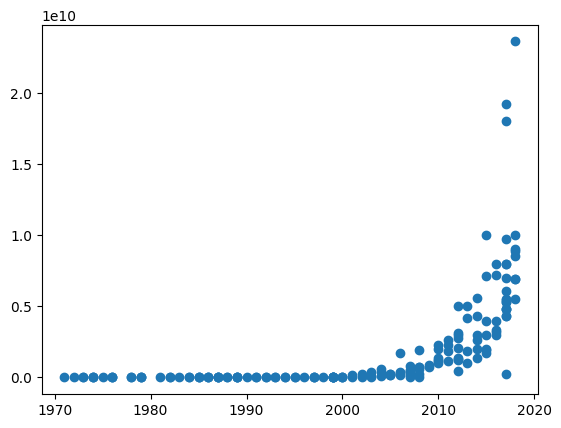

In [26]:
#plotting our data
plt.scatter(X,Y)

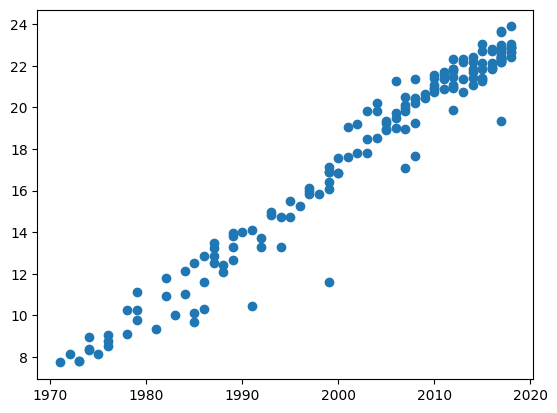

In [27]:
# Converting to linear model
Y = np.log(Y)
plt.scatter(X,Y)

In [28]:
#Normalizing the data for easier convergence
mx = np.mean(X)
sx = np.std(X)
my = np.mean(Y)
sy = np.std(Y)
Y = (Y-my)/sy
X = (X-mx)/sx

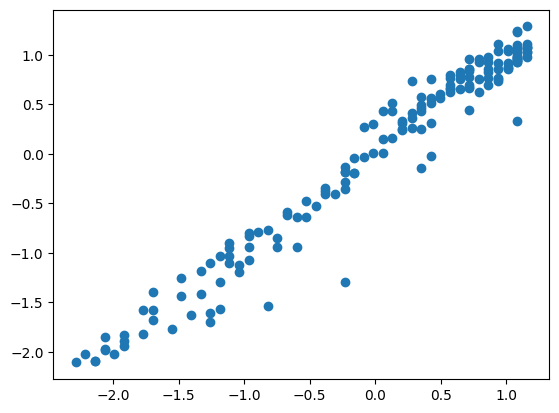

In [29]:
plt.scatter(X,Y) #Range has reduced

In [30]:
#Converting data from numpy to torch tensor
X_inputs = torch.from_numpy(X.astype(np.float32))
Y_target = torch.from_numpy(Y.astype(np.float32))

### Creating and Training the Model

In [31]:
model = nn.Linear(1,1)

In [32]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=1e-2,
                            momentum=0.7)

In [33]:
model.state_dict()

OrderedDict([('weight', tensor([[-0.7356]])), ('bias', tensor([-0.8740]))])

In [34]:
epochs = 100
losses = []
for epoch in range(epochs):
  #1. Zeroing the parameter gradients
  optimizer.zero_grad()
  #2. Forward Pass
  Y_pred = model(X_inputs)
  loss = loss_fn(Y_pred,Y_target)
  losses.append(loss.item())
  #4. Bactracking and Optimize
  loss.backward()
  optimizer.step()
  if epoch%10==0:
    print(f"Epoch {epoch+1}/{epochs} | Loss : {loss}")

Epoch 1/100 | Loss : 3.7475743293762207
Epoch 11/100 | Loss : 1.1992708444595337
Epoch 21/100 | Loss : 0.25201573967933655
Epoch 31/100 | Loss : 0.07499732822179794
Epoch 41/100 | Loss : 0.044651418924331665
Epoch 51/100 | Loss : 0.03952108696103096
Epoch 61/100 | Loss : 0.038655757904052734
Epoch 71/100 | Loss : 0.038509856909513474
Epoch 81/100 | Loss : 0.03848526254296303
Epoch 91/100 | Loss : 0.03848111629486084


In [35]:
model.state_dict()

OrderedDict([('weight', tensor([[0.9802]])), ('bias', tensor([-0.0002]))])

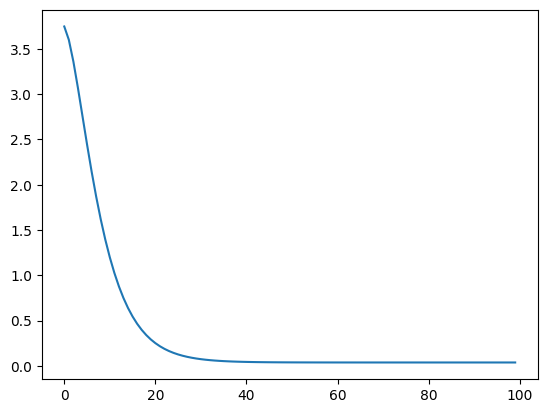

In [36]:
plt.plot(losses)

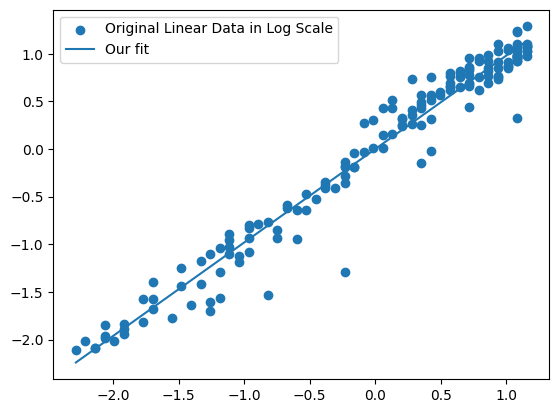

In [37]:
Prediction = model(X_inputs).detach().numpy()
plt.scatter(X,Y, label="Original Linear Data in Log Scale")
plt.plot(X,Prediction,label="Our fit")
plt.legend()
plt.show()

In [38]:
w = model.weight.data.numpy()
print(w)

[[0.9802356]]


Theoretically we saw that:
\begin{align}
\\
a = w\frac{\sigma_y}{\sigma_x}
\end{align}

In [40]:
a = w[0,0] * (sy/sx)
print(a)

0.34156556537767363


Time taken to double
\begin{align}
\\
t^{'} - t = \frac{\log 2}{\log r} = \frac{\log 2}{a}
\end{align}

In [41]:
print(f"Time taken to double: {np.log(2)/a}")

Time taken to double: 2.029323944858209
